# importing the required library

In [1]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Conv2D
from keras.layers import  Flatten
from keras.layers import Dense
from keras.layers import  MaxPooling2D
from keras.layers import BatchNormalization
from keras.models import load_model
import seaborn as sns
from sklearn.metrics import confusion_matrix

ModuleNotFoundError: No module named 'matplotlib'

In [10]:
#BATCH_SIZE = 32
BATCH_SIZE = 20
IMAGE_SIZE = 224
IMAGE_SIZE2 =224
#EPOCHS=50

In [11]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "train",
    #it will take all images from the directory
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE2),
    batch_size=BATCH_SIZE
)

Found 1736 files belonging to 2 classes.


In [12]:
class_names = dataset.class_names
class_names

['empty', 'non empty']

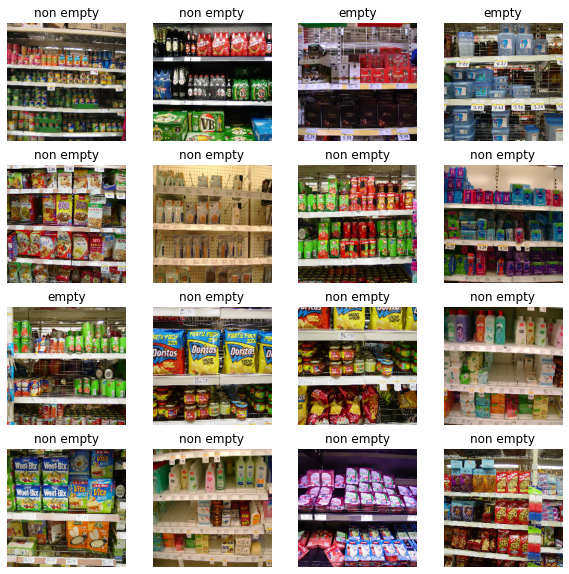

In [13]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(16):
        #each batch contain 22 images then less than 22 is taken
        ax = plt.subplot(4, 4, i + 1)
        #4,5 is 4 in 5 rows total 20
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

# creating cnn model

In [14]:
def build_Classification_Model():
    model=Sequential()
    model.add(Conv2D(16,(3,3),activation='relu',input_shape=(64,64,1)))
    model.add(MaxPooling2D((1,1)))
    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(2,activation="softmax"))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return models

# train the model

In [15]:
def train_model(model):
    train = ImageDataGenerator(rescale=1/255)
    valid = ImageDataGenerator(rescale=1/255)
    train_dataset = train.flow_from_directory(r"C:\Users\sudheer\Desktop\project\train",
                                         batch_size=32,
                                         target_size=(64,64),
                                         class_mode = 'categorical',
                                          color_mode='grayscale'
                                         )
    valid_dataset = valid.flow_from_directory(r"C:\Users\sudheer\Desktop\project\test",
                                         batch_size=32,
                                         target_size=(64,64),
                                         class_mode = 'categorical',
                                         color_mode='grayscale')
    spe=len(train_dataset.classes)//32
    ve=len(valid_dataset.classes)//32
    model.fit(train_dataset,
         steps_per_epoch=spe,
         epochs=5,
         validation_data=valid_dataset,
         validation_steps=ve)
    model.summary()
    return train_dataset, valid_dataset, spe, ve


In [16]:
model = build_Classification_Model()
train_dataset, valid_dataset, spe, ve = train_model(model)

Found 1736 images belonging to 2 classes.
Found 1567 images belonging to 2 classes.
Epoch 1/5
54/54 [==============================] - 255s 5s/step - loss: 0.2877 - accuracy: 0.8944 - val_loss: 0.0907 - val_accuracy: 0.9701
Epoch 2/5
54/54 [==============================] - 282s 5s/step - loss: 0.1899 - accuracy: 0.9525 - val_loss: 0.0583 - val_accuracy: 0.9746
Epoch 3/5
54/54 [==============================] - 281s 5s/step - loss: 0.1701 - accuracy: 0.9560 - val_loss: 0.1023 - val_accuracy: 0.9922
Epoch 4/5
54/54 [==============================] - 261s 5s/step - loss: 0.1320 - accuracy: 0.9665 - val_loss: 0.0371 - val_accuracy: 0.9928
Epoch 5/5
54/54 [==============================] - 257s 5s/step - loss: 0.1041 - accuracy: 0.9689 - val_loss: 0.1436 - val_accuracy: 0.9668
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 16)        160    

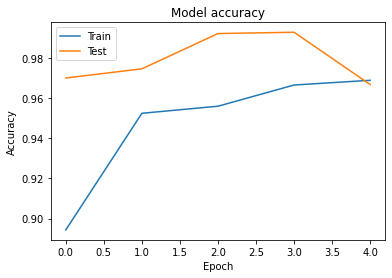

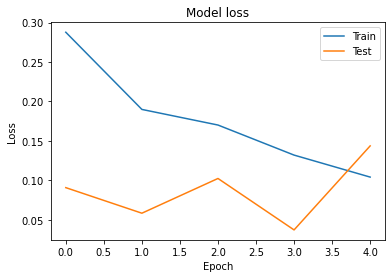

49/49 [==============================] - 107s 2s/step
True Positives:  1414
True Negatives:  4
False Positives:  53
False Negatives:  96


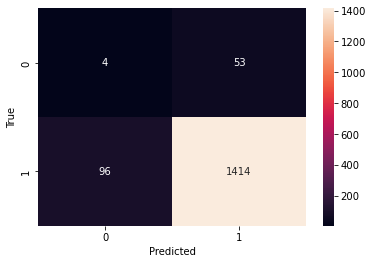

In [17]:
# Plot the training and validation accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc='upper right')
plt.show()

# Generate the confusion matrix
y_true = valid_dataset.classes
y_pred = model.predict(valid_dataset).argmax(axis=1)
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
# Print the values of TP, TN, FP, and FN
print('True Positives: ', TP)
print('True Negatives: ', TN)
print('False Positives: ', FP)
print('False Negatives: ', FN)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [18]:
model.save('my_model.h5')

# testing the model

In [19]:
def test(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(64,64))
    img= img/255
    plt.imshow(img)
    img = np.expand_dims(img,axis=0)
    res = np.argmax(model.predict(img),axis=1)
    if res[0]<1:
        print("empty")
    else:
        print("Non empty")

1/1 [==============================] - 0s 93ms/step
empty


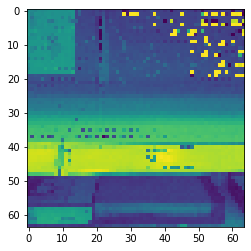

In [20]:
img=cv2.imread(r"C:\Users\sudheer\OneDrive\Desktop\pro\test\empty\20191005_212758250_iOS.jpg")
test(img)

1/1 [==============================] - 0s 28ms/step
empty


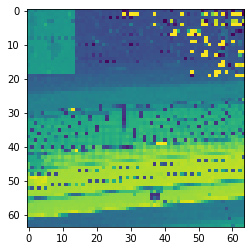

In [21]:
img=cv2.imread(r"C:\Users\sudheer\OneDrive\Desktop\pro\test\empty\20191005_212721902_iOS.jpg")
test(img)

1/1 [==============================] - 0s 23ms/step
Non empty


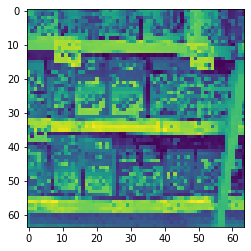

In [22]:
img=cv2.imread(r"C:\Users\sudheer\OneDrive\Desktop\pro\test\non empty\db557.jpg")
test(img)

1/1 [==============================] - 0s 23ms/step
Non empty


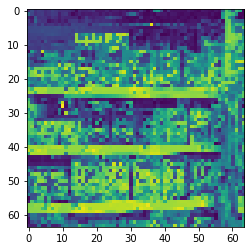

In [23]:
img=cv2.imread(r"C:\Users\sudheer\OneDrive\Desktop\pro\test\non empty\db564.jpg")
test(img)

# Notication Alert

In [24]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
from email.mime.image import MIMEImage

# Define email addresses and password
sender_email_address = 'gujjaralapudisunny@gmail.com'
sender_email_password = 'rknlfahtfqbjfphl'
receiver_email_address = 'bjaswanthsingh17@gmail.com'

# Create a multipart message object and set headers
message = MIMEMultipart()
message['From'] = sender_email_address
message['To'] = receiver_email_address
message['Subject'] = 'Alert'
with open(r"C:\Users\sudheer\OneDrive\Desktop\pro\test\empty\20191005_212758250_iOS.jpg", "rb") as f:
    img_data = f.read()

# Add message body
message.attach(MIMEText('Empty shelf is detected'))
message.attach(MIMEImage(img_data, name="image.jpg"))

# Create SMTP session and send email
smtpObj = smtplib.SMTP('smtp.gmail.com', 587)
smtpObj.ehlo()
smtpObj.starttls()
smtpObj.ehlo()
smtpObj.login(sender_email_address, sender_email_password)
smtpObj.sendmail(sender_email_address, receiver_email_address, message.as_string())
print('Email sent successfully.')

Email sent successfully.
